In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dosya yolunu belirtin
dosya_yolu = "/Users/beyzacakici/Desktop/train_project.csv"  # KullanıcıAdı kısmını kendi kullanıcı adınızla değiştirin

# CSV dosyasını okuyun
df = pd.read_csv(dosya_yolu)

# Veriyi gösterin
df.head()



,69769,-946,0.1613,0.7959999999999999,Panl,N,Bus2,0.0742,0,2,...,1.0.1,-4670,0.9851.2,0.0.13,0.26,Mard,0.0.14,0.3333.2,0.27,0.28
0,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
1,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
2,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
3,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0
4,114510,365243,0.1067,0.8096,Panl,N,XNAA,0.0525,0,2,...,2.0,-4138,0.9861,0.0,0,Mard,0.0,0.4583,0,0


In [4]:
df.shape
     

(246007, 122)

In [5]:
num_cols = len(df.columns)
df.columns = ["C" + str(i) for i in range(1, num_cols+1)]
     

In [14]:
df.head

<bound method NDFrame.head of             C1      C2      C3      C4    C5 C6    C7      C8  C9  C10  ...  \
0       236977     -92     NaN     NaN   NaN  Y  Othr     NaN   0    3  ...   
1       168821   -1646  0.1124  0.8504  Panl  N  Bus3  0.0387   0    2  ...   
2        94708   -1651  0.0263     NaN  Blok  N  Bus3     NaN   0    2  ...   
3        84556    -977     NaN     NaN   NaN  N  Rest     NaN   0    2  ...   
4       114510  365243  0.1067  0.8096  Panl  N  XNAA  0.0525   0    2  ...   
...        ...     ...     ...     ...   ... ..   ...     ...  ..  ...  ...   
246002  248161    -595     NaN     NaN   NaN  N  Bus3     NaN   0    2  ...   
246003  257069   -4334  0.1145  0.8368  Panl  N  Mede  0.1180   0    2  ...   
246004  154350  365243  0.3025  0.6056  Mixd  N  XNAA  0.2233   0    2  ...   
246005  148183  365243     NaN     NaN   NaN  N  XNAA     NaN   0    3  ...   
246006    5167  365243     NaN     NaN   NaN  Y  XNAA     NaN   0    2  ...   

        C113  C114   

In [6]:
df.dtypes

C1        int64
C2        int64
C3      float64
C4      float64
C5       object
         ...   
C118     object
C119    float64
C120    float64
C121      int64
C122      int64
Length: 122, dtype: object

In [7]:
df.isnull().sum()#hangi kolonda kaç tane null değer var buna baktık

C1           0
C2           0
C3      143829
C4      163543
C5      124975
         ...  
C118         0
C119       811
C120    122297
C121         0
C122         0
Length: 122, dtype: int64

In [8]:
NaColumn = df.columns[df.isnull().mean()>=0.10]
df= df.drop(NaColumn, axis=1)
#Eğer bir kolondaki değerlerin %10'tan fazlası null ise o kolonları datasetten çıkardık
     

In [9]:
dtypes = df.dtypes

continuous = []
binary = []
categorical = []
label = []

for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) == 2 and set(unique_values) <= set([0, 1]):
        binary.append(col)
    elif dtypes[col] == object:
        categorical.append(col)
    else:
        continuous.append(col)


binary.remove("C122")
label.append("C122")

In [10]:
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    unique_values = df[col].value_counts()
    print(f"{col}---{len(unique_values)}")

###hangi object tipindedeki sütunda kaç tane kategori var buna baktık

C6---2
C7---51
C17---7
C31---8
C32---6
C48---2
C68---5
C70---3
C94---7
C104---2
C118---6


In [11]:
for column in df.columns:

    unique_values = df[column].unique()
    if len(unique_values) == 2:
        binary = {unique_values[0]: 0, unique_values[1]: 1}
        df[column] = df[column].replace(binary)
  
###2 kategori içeren object tipindeki sütunlardaki kategorileri binary hale getirdik for döngüsü yardımıyla aşağıda da A1 ve A6 sütununu çalıştırarak kontrol ettik 
### 236977 ID'li kişinin A6 sütununda karşısında Y yazıyordu ve bunu 1'e çevirmiş yani for döngümüz çalışmış  
print(df[['C1', 'C6']].head())
     

       C1  C6
0  236977   0
1  168821   1
2   94708   1
3   84556   1
4  114510   1


In [12]:
column_cat = df.select_dtypes(include='object').columns
print(column_cat)
#bu işlemlerin ardından 8 kategorik datamız kaldı bunları elemeden önce satır bazında eğer kalan kolonlardan yarısı boş olan bir datamız varsa bu datayı setten çıkartalım
     

Index(['C7', 'C17', 'C31', 'C32', 'C68', 'C70', 'C94', 'C118'], dtype='object')


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

for col in categorical:
    df[col] = le.fit_transform(df[col])

for col in categorical:
    if len(df[col].unique()) == 2:
        categorical.remove(col)
        binary.append(col)
#### bu kısım aslında yukarda 2 kategori içerenleri binary yapma kısmı ama bu berkantın yazdığı kod benim yazdığım yukarda



AttributeError: 'dict' object has no attribute 'append'

In [15]:
df[continuous] = df.groupby("C122")[continuous].apply(lambda x: x.fillna(x.median()))

#sayısal değer olup NA değer içeren sütunlardaki NA'ler yerine o sütunun medianı ile doldurduk
     

In [16]:
df[categorical] = df.groupby("C122")[categorical].apply(lambda x: x.fillna(x.mode().iloc[0]))

#### kategorik data içeren ve NA olan sütunlardaki NA'leri o sütunun mode'u ile doldurduk
     

In [17]:

df.isnull().sum()
     

C1      0
C2      0
C6      0
C7      0
C9      0
       ..
C117    0
C118    0
C119    0
C121    0
C122    0
Length: 65, dtype: int64

In [18]:
df["C122"].value_counts()
df["C122"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

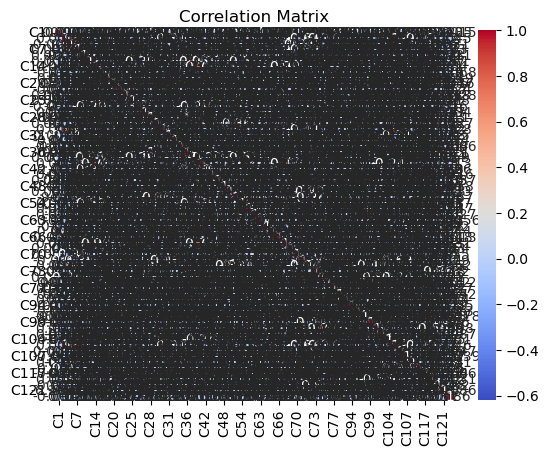

In [19]:
#compute the correlation matrix 

corr_matrix = df.corr()

#visualize the correlation matrix with a heatmap 

sns.heatmap(corr_matrix, cmap='coolwarm', annot = True)

plt.title('Correlation Matrix')
plt.show()

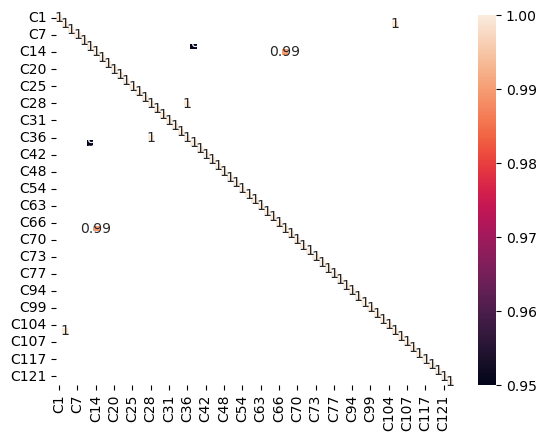

In [20]:
#tüm datayı aldığımız zaman korelasyonumuzun çıktısı okunmaz bir durumda bu sebeple 
corr_matrix = df.corr().round(2)

# 0.9'dan fazla korelasyon içeren sütunları filtreledik
corr_filtered = corr_matrix[(corr_matrix > 0.90) | (corr_matrix < -0.90)]

sns.heatmap(corr_filtered, annot=True)
plt.show()

In [21]:
df.head()

,C1,C2,C6,C7,C9,C10,C14,C16,C17,C20,...,C105,C106,C107,C109,C114,C117,C118,C119,C121,C122
0,236977,-92,0,30,0,3,135000.0,0,6,0,...,0,0,0,0,-1994,0,1,0.0,0,0
1,168821,-1646,1,5,0,2,553500.0,0,5,0,...,0,0,0,0,-2842,0,3,0.0,0,1
2,94708,-1651,1,5,0,2,391500.0,0,6,0,...,0,0,0,0,-1345,0,3,0.0,0,1
3,84556,-977,1,35,0,2,225000.0,0,6,0,...,0,0,0,0,-852,0,3,0.0,0,0
4,114510,365243,1,50,0,2,225000.0,0,6,0,...,1,0,0,0,-4138,0,1,0.0,0,0


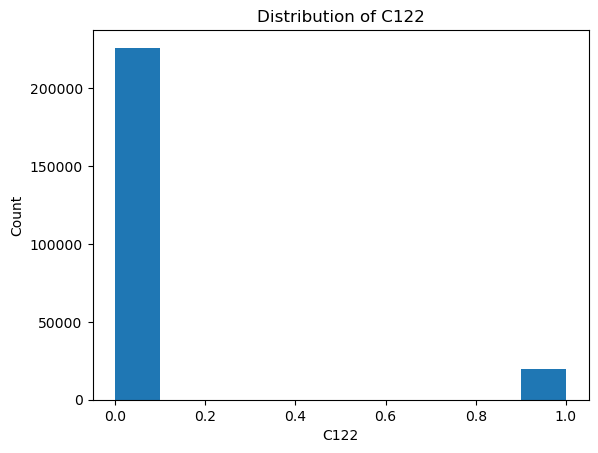

In [22]:
#plot a histogram of the some columns 

plt.hist(df['C122'], bins = 10)
plt.xlabel('C122')
plt.ylabel('Count')
plt.title('Distribution of C122')
plt.show()

#labellanmış sütunun C122 olduğunu düşündüğüm için onun dağılımını çıkarttım 

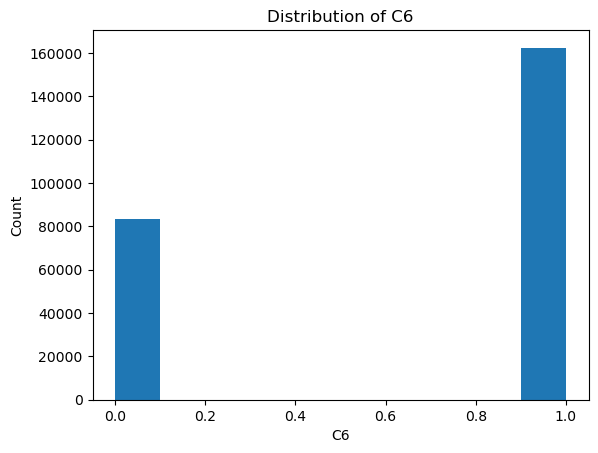

In [23]:
#farklı sütunlarda denedim (yes/no sütunu)

plt.hist(df['C6'], bins = 10)
plt.xlabel('C6')
plt.ylabel('Count')
plt.title('Distribution of C6')
plt.show()


In [24]:
sns.countplot(x='C115', data=df)
plt.xlabel('C115')
plt.ylabel('Count')
plt.title('Distribution of C115')
plt.show()

ValueError: Could not interpret input 'C115'

In [ ]:
sns.countplot(x='C6', data=df)
plt.xlabel('C6')
plt.ylabel('Count')
plt.title('Distribution of C6')
plt.show()

In [ ]:
sns.countplot(x='C10', data=df)
plt.xlabel('C10')
plt.ylabel('Count')
plt.title('Distribution of C10')
plt.show()

In [ ]:
#create scatter plorts of some columns against column C122

plt.figure(figsize=(36,12))

plt.subplot(131)
plt.scatter(df['C119'][df['C122']==0], df['C121'][df['C122']==0], alpha=0.5, color='purple')
plt.scatter(df['C119'][df['C122']==1], df['C121'][df['C122']==1], alpha=0.5, color='yellow')
plt.xlabel('C119')
plt.ylabel('C121')
plt.title('Scatter Plot of C119 vs C121 (C122=0)')
plt.grid(True)


plt.show()

In [31]:
from sklearn.model_selection import train_test_split

In [33]:
#split the data into training and testing sets 

x = df.drop(['C122'],axis=1)
y = df['C122']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [34]:
df.C122.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: C122, dtype: float64

In [36]:
y_train = y.value_counts(normalize=True)

y_train.value_counts(normalize=True)

0.919271    0.5
0.080729    0.5
Name: C122, dtype: float64

In [43]:
#burada stratify değerine tablodan y değişkenini atamış 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify =df.C122)

In [45]:
y_train.value_counts(normalize = True)

0    0.91927
1    0.08073
Name: C122, dtype: float64

In [47]:
#regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [48]:
#create a LogisticRegression Object 

lr = LogisticRegression()

In [49]:
#train the model on the training data

lr.fit(x_train, y_train)

/Users/beyzacakici/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
#make predictions on the test data 

y_pred = lr.predict(x_test)

In [51]:
#evaluate the performance of the model 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.919251249949189


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scale the data using a standard scaler

scaler = StandardScaler()

